# Proyek Analisis Data: [*Titanic*]
- **Nama:** [Rama Syailana Dewa]
- **Email:** [ramasyailana3@gmail.com]
- **Source Dataset** [https://www.kaggle.com/c/titanic]

**Pertanyaan**
- **Berapa proporsi penumpang yang selamat?**
- **Apakah ada korelasi antara fitur "Age" dan "Fare"?**
- **Bagaimana distribusi penumpang berdasarkan kelas dan jenis kelamin?** 

**Hasil EDA harus divisualisasikan menggunakan matplotlib atau seaborn.**



## Import Semua Packages/Library yang digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Mengimport semua library yang dibutuhkan dalam Analisis

## Data Wrangling

### Gathering Data
- Pada tahap ini kita akan mengumpulkan data yang kita butuhkan. karena dataset Titanic, maka import train.csv

#### Load tabel train

In [3]:
train_df = pd.read_csv("dataset/titanic/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Insight:**
- Pada tahap ini kita telah mengumpulkan data yang dibutuhkan

### Assessing Data

**Asses train_df**
1. Mengecek nama head columns train_df

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

2. Mengecek tipe data train_df

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


3. Mengecek apakah ada missing values

In [6]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

4. Mengecek apakah ada duplicate data

In [7]:
print("Jumlah duplikasi data: ", train_df.duplicated().sum())

Jumlah duplikasi data:  0


5. Mengecek apakah terdapat keanehan pada nilai statistiknya

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Insight**

*train_df*

1. Kolom dengan nilai kosong:
- Age memiliki 177 nilai kosong (20% dari data).
- Cabin memiliki 687 nilai kosong (77% dari data).
- Embarked memiliki 2 nilai kosong (hanya 0,2% dari data).

2. Tidak ada duplikasi data.

3. Distribusi Statistik:
- Rata-rata usia (Age): ~29,7 tahun.
- Sebagian besar penumpang berada di kelas 3 (Pclass), terlihat dari median 3 pada kolom ini.
- Tarif tiket (Fare) memiliki nilai maksimum hingga 512,33 yang menandakan adanya outlier.

4. Langkah Cleaning yang Dapat Dilakukan:
- Ambil kolom sesuai topik saja
- Isi nilai kosong di Age menggunakan median atau prediksi berbasis model.
- Pertimbangkan untuk menghapus kolom Cabin karena terlalu banyak nilai kosong, atau ubah menjadi indikator apakah ada informasi kabin atau tidak.
- Isi nilai kosong pada Embarked dengan mode (karena hanya 2 nilai yang kosong).

### Cleaning Data

1. Memilih kolom yang relevan

In [112]:
# Pilih kolom tertentu dari dataframe
selected_columns = train_df[['Survived', 'Age', 'Fare', 'Pclass', 'Sex']]
selected_columns.head()


,Survived,Age,Fare,Pclass,Sex
0,0,22.0,7.2500,3,male
1,1,38.0,71.2833,1,female
2,1,26.0,7.9250,3,female
3,1,35.0,53.1000,1,female
4,0,35.0,8.0500,3,male


2. Mengisi nilai kosong di dalam "Age"

In [54]:
selected_columns['Age'].fillna(selected_columns['Age'].median(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8256\899223286.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_columns['Age'].fillna(selected_columns['Age'].median(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8256\899223286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Age'].fillna(selected_co

In [56]:
selected_columns.isna().sum() # Pastikan tidak ada nilai kosong

Survived    0
Age         0
Fare        0
Pclass      0
Sex         0
dtype: int64

3. Memeriksa outlier pada kolom "Fare"

In [113]:
Q1 = selected_columns['Fare'].quantile(0.25)
Q3 = selected_columns['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
selected_columns = selected_columns[(selected_columns['Fare'] >= lower_bound) & (selected_columns['Fare'] <= upper_bound)]


In [114]:
selected_columns.describe()

,Survived,Age,Fare,Pclass
count,775.000000,613.000000,775.000000,775.00000
mean,0.339355,28.946574,17.822091,2.48000
std,0.473796,14.368139,13.578085,0.73439
min,0.000000,0.420000,0.000000,1.00000
25%,0.000000,20.000000,7.895800,2.00000
50%,0.000000,28.000000,13.000000,3.00000
75%,1.000000,37.000000,26.000000,3.00000
max,1.000000,80.000000,65.000000,3.00000


**insight**
- Memilih kolom 'Survived', 'Age', 'Fare', 'Pclass', 'Sex' untuk menyederhanakan data dan fokus pada variabel yang berkaitan dengan hasil yang ingin dianalisis
- Mengisi nilai kosong pada kolom 'Age' karena sensitif dengan outlier sehingga kita isi nilainya dengan median
- Sebelumnya kolom 'Fare' memiliki outlier yang sangat tinggi(512,33), saya menggunakan metode IQR untuk menghilangkan outlier pada 'Fare' agar tidak berdampak negatif pada proses analisis 

EDA

1. Visualisasi Kategori

In [128]:
import matplotlib.pyplot as plt

def bar_plot(variable): 
    """
        input: variable 
        output : bar plot & value count
    """
    var = selected_columns[variable]
    varValue = var.value_counts()

    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

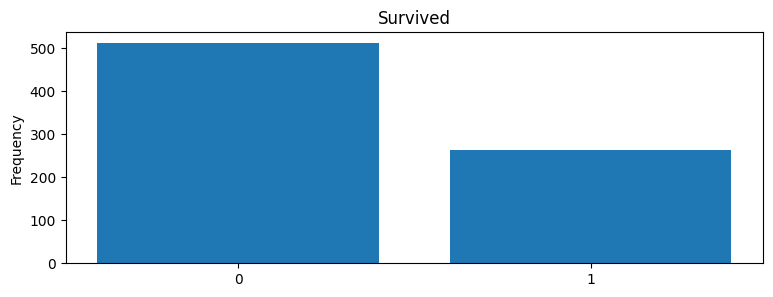

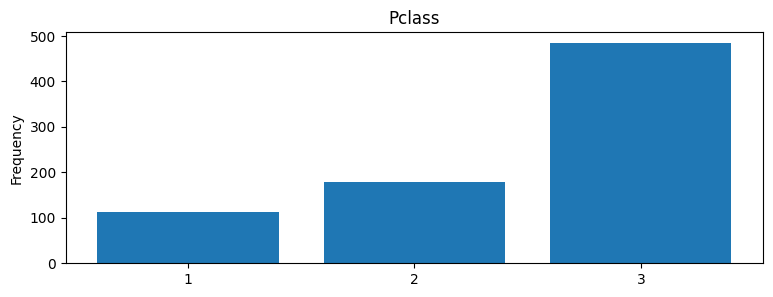

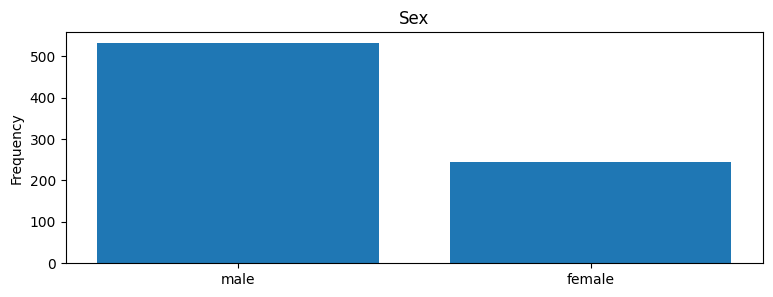

In [129]:
category1 = ["Survived","Pclass","Sex"]
for c in category1:
    bar_plot(c)

2. Distribusi Numerik

In [117]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(selected_columns[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

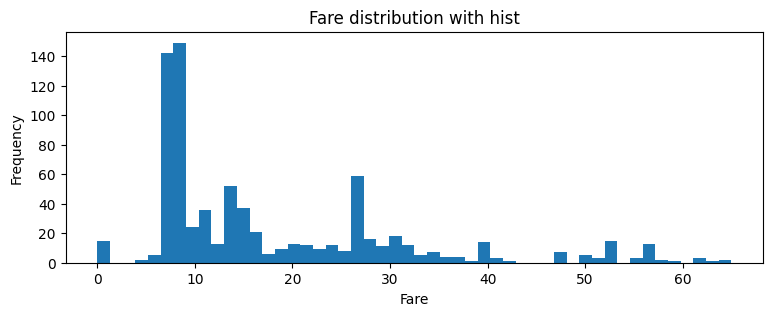

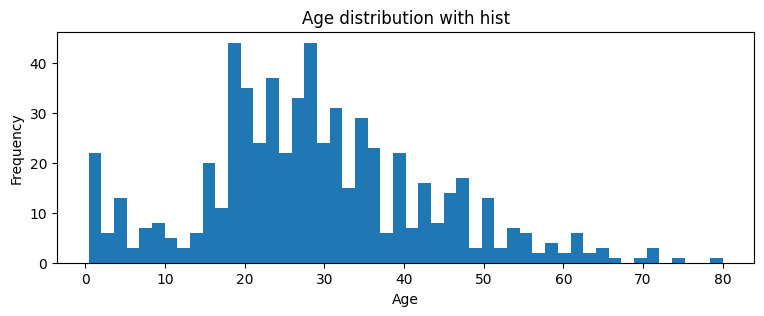

In [118]:
numericVar = ["Fare", "Age"]
for n in numericVar:
    plot_hist(n)

3. Pengelompokan Data

In [119]:
selected_columns.groupby(['Survived'])['Survived'].count()

Survived
0    512
1    263
Name: Survived, dtype: int64

In [120]:
selected_columns.groupby(['Pclass', 'Sex'])['Sex'].count()

Pclass  Sex   
1       female     27
        male       85
2       female     76
        male      103
3       female    141
        male      343
Name: Sex, dtype: int64

In [121]:
# Correlation calculation
print("Correlation matrix:")
print(selected_columns[["Age", "Fare"]].corr())
# Pearson correlation
correlation = selected_columns[["Age", "Fare"]].corr().iloc[0, 1]
print(f"Pearson Correlation between Age and Fare: {correlation:.2f}")   

Correlation matrix:
           Age      Fare
Age   1.000000  0.090865
Fare  0.090865  1.000000
Pearson Correlation between Age and Fare: 0.09


4. Korelasi dengan Heatmap 

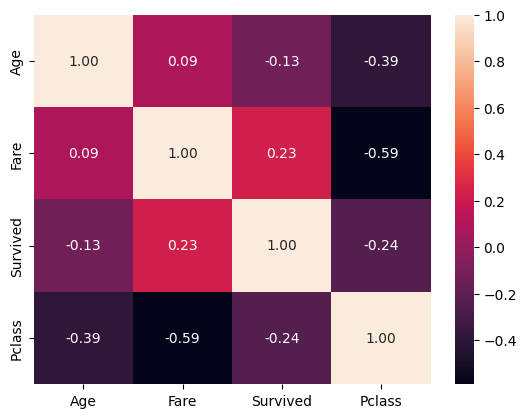

In [126]:
import seaborn as sns
list1 = ["Age", "Fare", "Survived","Pclass"]
sns.heatmap(selected_columns[list1].corr(), annot = True, fmt = ".2f")
plt.show()

**Insight**

1. Visualisasi Kategori
Berdasarkan analisis kategori pada variabel `Survived`, `Pclass`, dan `Sex`:
- Lebih dari setengah penumpang tidak selamat dari insiden Titanic.
- Kelas 3 merupakan kelas dengan jumlah penumpang terbanyak.
- Pria merupakan mayoritas penumpang di setiap kelas.

2. Distribusi Numerik
Analisis distribusi menggunakan histogram pada variabel numerik seperti `Age` dan `Fare`:
- Sebagian besar penumpang membayar tarif di bawah 10, dengan distribusi yang condong ke kanan (skewed to the right)**.
- Sebagian besar penumpang berusia antara 10 hingga 50 tahun.

3. Pengelompokan Data
Analisis distribusi menggunakan `groupby`:

Distribusi `Survived`:
- 512 penumpang tidak selamat (Survived = 0), sedangkan 263 penumpang selamat (Survived = 1).
- Tingkat keselamatan hanya sekitar 34%, sementara mayoritas (66%) tidak selamat.

Distribusi `Pclass` dan `Sex`:
- Kelas 1: 
  - 27 wanita dan 85 pria, total 112 penumpang.
- Kelas 2: 
  - 76 wanita dan 103 pria, total 179 penumpang.
- Kelas 3: 
  - 141 wanita dan 343 pria, total 484 penumpang.
- Mayoritas penumpang berada di kelas 3, dan sebagian besar adalah pria.

Korelasi antara `Age` dan `Fare`:
- Matriks korelasi menunjukkan nilai 0.09, yang menunjukkan hubungan yang sangat lemah antara usia dan tarif.
- Pearson Correlation (0.09) menguatkan bahwa usia tidak memengaruhi tarif.

4. Korelasi dengan Heatmap
Berdasarkan heatmap korelasi:
- Age dan Fare memiliki korelasi yang sangat lemah (0.09).
- Fare dan Survived menunjukkan korelasi positif kecil (0.23), artinya tarif yang lebih tinggi sedikit berhubungan dengan peluang bertahan hidup yang lebih besar.
- Pclass dan Fare memiliki korelasi negatif yang signifikan (-0.59), menunjukkan bahwa kelas penumpang yang lebih tinggi cenderung membayar tarif lebih mahal.
- Survived dan Pclass memiliki korelasi negatif (-0.24), menunjukkan bahwa penumpang di kelas yang lebih tinggi lebih mungkin bertahan hidup.
- Secara umum, tidak ada korelasi yang sangat tinggi di antara variabel, sehingga hubungan antarvariabel bersifat lemah hingga sedang.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa proporsi jumlah penumpang yang selamat ?

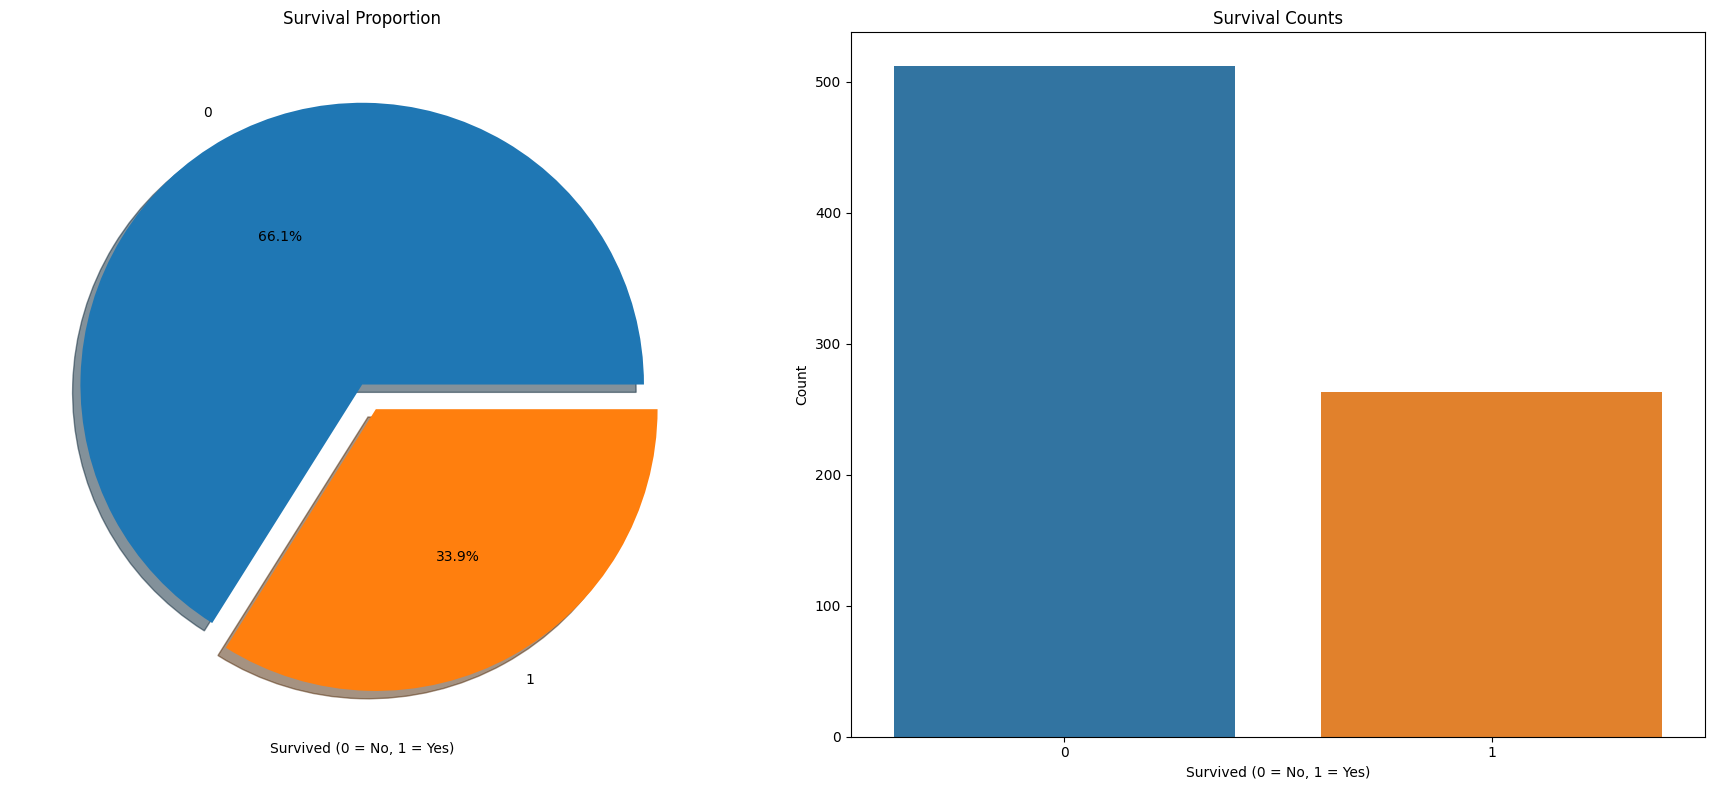

Survived
0    512
1    263
Name: Survived, dtype: int64

In [133]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie Chart
selected_columns['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True
)
ax[0].set_title('Survival Proportion')
ax[0].set_xlabel('Survived (0 = No, 1 = Yes)')
ax[0].set_ylabel('')

# Count Plot
sns.countplot(x='Survived', hue='Survived', data=selected_columns, ax=ax[1], legend=False)
ax[1].set_title('Survival Counts')
ax[1].set_xlabel('Survived (0 = No, 1 = Yes)')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

selected_columns.groupby(['Survived'])['Survived'].count()


### Pertanyaan 2: Apakah ada korelasi antara fitur "Age" dan "Fare" ?

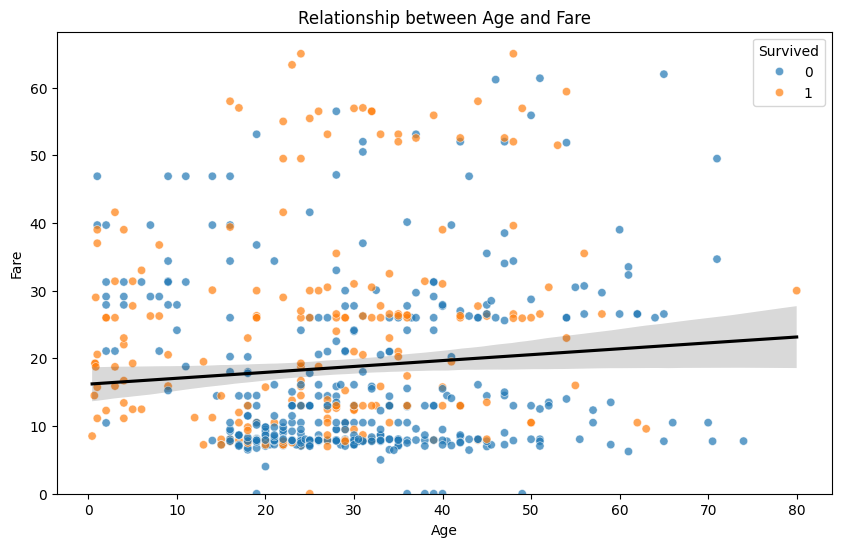

Correlation matrix:
           Age      Fare
Age   1.000000  0.090865
Fare  0.090865  1.000000
Pearson Correlation between Age and Fare: 0.09


In [124]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=selected_columns, alpha=0.7)
sns.regplot(x="Age", y="Fare", data=selected_columns, scatter=False, color="black")  # Regression line
plt.ylim(0,)
plt.title("Relationship between Age and Fare")
plt.show()

# Correlation calculation
print("Correlation matrix:")
print(selected_columns[["Age", "Fare"]].corr())
# Pearson correlation
correlation = selected_columns[["Age", "Fare"]].corr().iloc[0, 1]
print(f"Pearson Correlation between Age and Fare: {correlation:.2f}")


### Pertanyaan 3: Bagaimana distribusi penumpang berdasakan kelas dan jenis kelamin ?

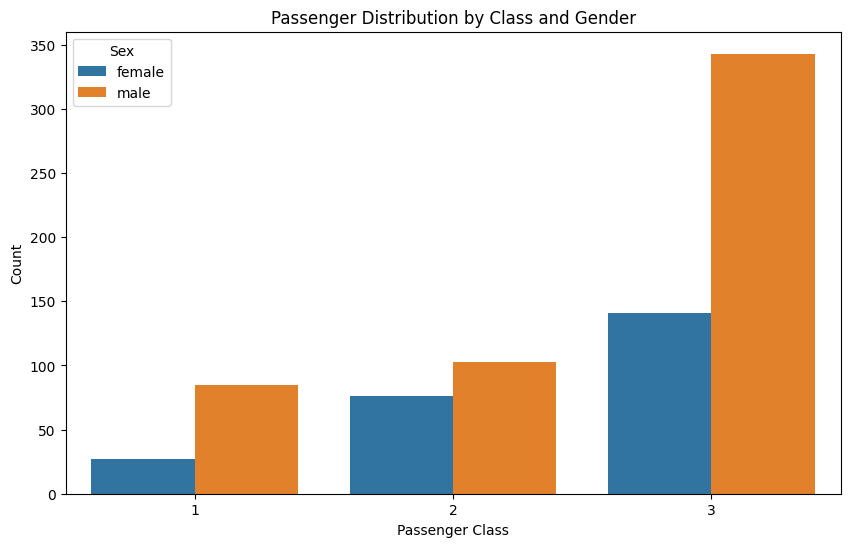

Pclass  Sex   
1       female     27
        male       85
2       female     76
        male      103
3       female    141
        male      343
Name: Sex, dtype: int64

In [125]:

# Distribution by Class and Gender  
plt.figure(figsize=(10, 6))
sns.countplot(data=selected_columns, x="Pclass", hue="Sex")
plt.title("Passenger Distribution by Class and Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

selected_columns.groupby(['Pclass', 'Sex'])['Sex'].count()


**Insight**
- Pertanyaan 1: Berdasarkan visualisasi data menggunakan `piechart` (61.6% dari individu tidak selamat (Survived = 0), sedangkan 38.4% selamat (Survived = 1).) dan `barplot` (Terdapat lebih dari 500 individu yang tidak selamat dibandingkan sekitar 300 individu yang selamat.), tepatnya terdapat 512 individu yang tidak selamat dibandingkan 263 individu yang selamat, dapat disimpulkan bahwa ketidakseimbangan ini menunjukkan bahwa jumlah orang yang tidak selamat jauh lebih besar dibandingkan dengan mereka yang selamat.

- Pertanyaan 2: Berdasarkan visualisasi `scaterplot` tentang relasi antara umur dan tarif adalah positif namun lemah. Korelasi antara Age dan Fare sangat lemah (0.09, hampir tidak signifikan secara statistik). Ini menunjukkan bahwa tarif yang dibayarkan seseorang tidak secara langsung terkait dengan usianya. Faktor-faktor lain (seperti kelas perjalanan atau rute) lebih mungkin memengaruhi tarif.

- Pertanyaan 3: Kelas 3 adalah kelas dengan jumlah penumpang terbanyak, terutama laki-laki. Secara keseluruhan, jumlah penumpang laki-laki lebih tinggi di semua kelas perjalanan dibandingkan perempuan. Perbedaan signifikan terlihat pada Kelas 3, di mana jumlah laki-laki lebih dari dua kali lipat jumlah perempuan.

## Kesimpulan

- Kesimpulan Pertanyaan 1: Bagaimana distribusi keselamatan penumpang (Survived)?
    - Ketidakseimbangan antara individu yang selamat dan tidak selamat sangat mencolok. Dari total penumpang, 61.6% tidak selamat (512 individu) dibandingkan dengan 38.4% yang selamat (263 individu). Hal ini menunjukkan bahwa jumlah penumpang yang tidak selamat jauh lebih besar dibandingkan dengan yang selamat. Data ini menggambarkan tingkat keselamatan yang rendah pada perjalanan tersebut.
- Kesimpulan Pertanyaan 2: Bagaimana hubungan antara usia (Age) dan tarif (Fare)?
    - Hubungan antara usia dan tarif yang dibayarkan menunjukkan korelasi positif yang sangat lemah, dengan nilai korelasi sebesar 0.09. Hal ini menunjukkan bahwa usia seseorang tidak memiliki pengaruh signifikan terhadap tarif yang dibayarkan. Faktor-faktor lain, seperti kelas perjalanan (Pclass) atau tujuan perjalanan, kemungkinan lebih memengaruhi perbedaan tarif daripada usia.
- Kesimpulan Pertanyaan 3: Bagaimana distribusi penumpang berdasarkan kelas (Pclass) dan jenis kelamin (Sex)?
    - Kelas 3 merupakan kelas dengan jumlah penumpang terbanyak, didominasi oleh laki-laki. Secara keseluruhan, jumlah penumpang laki-laki lebih tinggi di semua kelas perjalanan dibandingkan perempuan. Perbedaan paling signifikan terlihat pada Kelas 3, di mana jumlah laki-laki lebih dari dua kali lipat jumlah perempuan. Distribusi ini menunjukkan bahwa Kelas 3, sebagai kelas yang lebih ekonomis, menarik lebih banyak penumpang, khususnya laki-laki.